# Receive and Decode Amplitude Modulation

Starting UDP packet capture...
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes
Received UDP packet size: 100 bytes
Received UDP packet size: 500 bytes


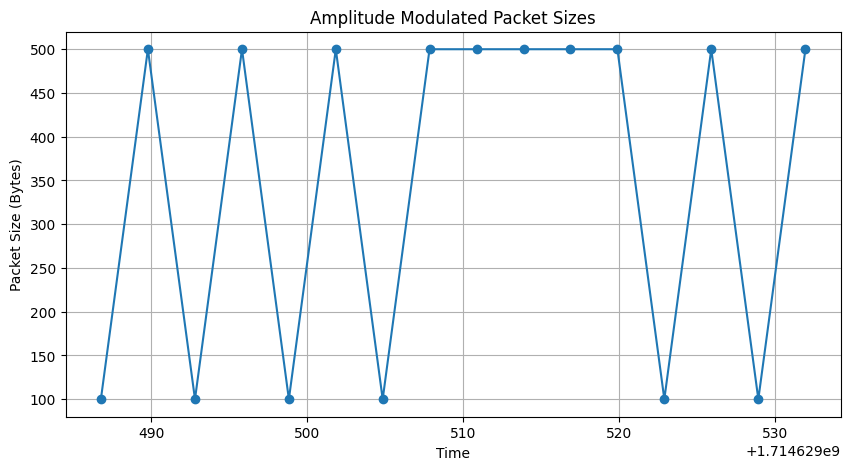

Decoded binary data: 0101010111110101


In [3]:
from scapy.all import sniff, IP, UDP
import matplotlib.pyplot as plt
import numpy as np

# Initialize global lists to store packet sizes and timestamps
packet_sizes = []
timestamps = []

def handle_packet(packet):
    """ Handle each packet, extract size, and store it with a timestamp. """
    if packet.haslayer(UDP):
        size = len(packet[UDP].payload)
        packet_sizes.append(size)
        timestamps.append(packet.time)
        print(f"Received UDP packet size: {size} bytes")

def plot_and_decode_packet_sizes(packet_sizes, timestamps):
    """ Plot packet sizes and decode them into binary data based on size thresholds. """
    # Define thresholds (assuming 100 bytes for '0' and 500 bytes for '1')
    threshold = (100 + 500) / 2
    binary_data = ''.join(['0' if size < threshold else '1' for size in packet_sizes])

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(timestamps, packet_sizes, 'o-')
    plt.title('Amplitude Modulated Packet Sizes')
    plt.xlabel('Time')
    plt.ylabel('Packet Size (Bytes)')
    plt.grid(True)
    plt.show()

    print(f"Decoded binary data: {binary_data}")

def main():
    # Start packet sniffing
    print("Starting UDP packet capture...")
    target_port = 12345
    sniff(filter=f"udp port {target_port}", prn=handle_packet, store=False, count=16)  # Adjust timeout as necessary

    # After capture, process and plot
    if packet_sizes:
        plot_and_decode_packet_sizes(packet_sizes, timestamps)

if __name__ == "__main__":
    main()
